   # CAPSTONE 1: EDUCATION PROJECT


   <img src='data/education_image.jpg' width="900">
   
   **Credit:**  [wsimag](https://wsimag.com/culture/60264-education-in-venezuela-the-americas-and-the-world)



In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

sns.set(style='ticks')

warnings.filterwarnings("ignore")  # Suppress all warnings

# Introduction

## Business Context
Research shows that high-poverty areas disproportionally educate children of color. The chances of ending up in a high-poverty or high-minority school are highly determined by a student’s race/ethnicity and social class. For instance, African American and Hispanic students—even if they are not poor—are much more likely than White or Asian students to be in high-poverty schools.

There is a growing body of evidence that shows increased investment on education returns better outcomes and that the positive effects are even greater among low-income students. On the other hand, it costs more to educate low-income students and provide them with a robust education capable of overcoming their initial disadvantages.


### Goals
1. Understand the current demographics of wealthy to high-poverty schools across the state of California.
2. Identify how much funding is available per pupil in wealthy vs high-poverty areas.
3. Learn what factors are most correlated with student performance.


#### Predictive modeling
What's the average test score per school?
What's the percentage of students who pass/not pass?


# DATA WRANGLING

The process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

- Extracting relevant data. Let's start looking at the datasets!

## 1. Assessment Data

- It contains assessment data for the Smarter Balance Summative Assessment (2018-2019) for the state of California.

- Legend types can be found here: https://caaspp-elpac.cde.ca.gov/caaspp/research_fixfileformat19
- More information about assesment set up: https://www.cde.ca.gov/ta/tg/ca/sbsummativefaq.asp
- Research file info: https://caaspp-elpac.cde.ca.gov/caaspp/ResearchFileList?ps=true&lstTestYear=2019&lstTestType=B&lstCounty=00&lstDistrict=00000&lstSchool=0000000

In [2]:
# load datafile
df_all = pd.read_csv('large_data/sb_ca2019_all_csv_v4.txt')

In [3]:
# create dataset containing district level data
df_district = df_all[df_all['School Code'] == 0000000]

In [4]:
# create dataset containing school level data
df_school = df_all.drop(df_all[df_all['School Code'] == 0].index)
df_school

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,...,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
1888,1,10017,112607,NaN,2019,1,B,85,84,11,...,37.35,12.20,60.98,26.83,7.23,71.08,21.69,13.25,61.45,25.30
1889,1,10017,112607,NaN,2019,3,B,42,42,11,...,35.71,14.29,50.00,35.71,7.14,76.19,16.67,9.52,64.29,26.19
1890,1,10017,112607,NaN,2019,4,B,43,42,11,...,39.02,10.00,72.50,17.50,7.32,65.85,26.83,17.07,58.54,24.39
1891,1,10017,112607,NaN,2019,6,B,79,78,11,...,33.77,13.16,63.16,23.68,7.79,71.43,20.78,14.29,63.64,22.08
1892,1,10017,112607,NaN,2019,7,B,*,*,11,...,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576486,58,72769,5838305,NaN,2019,222,B,*,*,13,...,*,*,*,*,*,*,*,*,*,*
3576487,58,72769,5838305,NaN,2019,223,B,*,*,13,...,*,*,*,*,*,*,*,*,*,*
3576488,58,72769,5838305,NaN,2019,224,B,19,19,13,...,57.89,0.00,63.16,36.84,5.26,57.89,36.84,0.00,0.00,0.00
3576489,58,72769,5838305,NaN,2019,226,B,54,54,13,...,55.56,16.67,44.44,38.89,14.81,57.41,27.78,0.00,0.00,0.00


In [5]:
# check columns names
df_school.columns

Index(['County Code', 'District Code', 'School Code', 'Filler', 'Test Year',
       'Subgroup ID', 'Test Type', 'Total Tested At Entity Level',
       'Total Tested with Scores', 'Grade', 'Test Id',
       'CAASPP Reported Enrollment', 'Students Tested', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores',
       'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
       'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard'],
      dtype='object')

In [6]:
# check data type
df_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3013079 entries, 1888 to 3576490
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   County Code                        int64  
 1   District Code                      int64  
 2   School Code                        int64  
 3   Filler                             float64
 4   Test Year                          int64  
 5   Subgroup ID                        int64  
 6   Test Type                          object 
 7   Total Tested At Entity Level       object 
 8   Total Tested with Scores           object 
 9   Grade                              int64  
 10  Test Id                            int64  
 11  CAASPP Reported Enrollment         object 
 12  Students Tested                    object 
 13  Mean Scale Score                   object 
 14  Percentage Standard Exceeded       object 
 15  Percentage Standard Met            object 
 16  Percentage Stan

In [7]:
# Check for missing data
df_school.isnull().sum()

County Code                                0
District Code                              0
School Code                                0
Filler                               3013079
Test Year                                  0
Subgroup ID                                0
Test Type                                  0
Total Tested At Entity Level               0
Total Tested with Scores                   0
Grade                                      0
Test Id                                    0
CAASPP Reported Enrollment                 0
Students Tested                            0
Mean Scale Score                      797631
Percentage Standard Exceeded               0
Percentage Standard Met                    0
Percentage Standard Met and Above          0
Percentage Standard Nearly Met             0
Percentage Standard Not Met                0
Students with Scores                       0
Area 1 Percentage Above Standard           0
Area 1 Percentage Near Standard            0
Area 1 Per

- Verifying number of rows where Subgroup Id == 1:
    - Summary of all students per school 

In [8]:
# Number of rows where subgroup ID == 1
df_school[df_school['Subgroup ID'] == 1].count()

County Code                          87324
District Code                        87324
School Code                          87324
Filler                                   0
Test Year                            87324
Subgroup ID                          87324
Test Type                            87324
Total Tested At Entity Level         87324
Total Tested with Scores             87324
Grade                                87324
Test Id                              87324
CAASPP Reported Enrollment           87324
Students Tested                      87324
Mean Scale Score                     66727
Percentage Standard Exceeded         87324
Percentage Standard Met              87324
Percentage Standard Met and Above    87324
Percentage Standard Nearly Met       87324
Percentage Standard Not Met          87324
Students with Scores                 87324
Area 1 Percentage Above Standard     87324
Area 1 Percentage Near Standard      87324
Area 1 Percentage Below Standard     87324
Area 2 Perc

In [9]:
# Check number of unique schools
df_school['School Code'].nunique()

10300

- There are 10,300 schools!

## Creating two datasets for modeling

- Language Arts & Literature: test_id == 1

    - 10,299 rows
    
    
- Mathematics: test_id == 2

    - 10,298 rows



In [10]:
# Filter Grade == 13 summary of all grades per school
all_grades = df_school[df_school['Grade'] == 13]

# Filter Subgroup ID == 1 summary of all students
all_students = all_grades[all_grades['Subgroup ID'] == 1]

- Language Arts & Literature Dataset:

In [11]:
# Create df_test1 language arts & literature 
df_test1 = all_students[all_students['Test Id'] == 1]

# drop columns that won't be used
df_language = df_test1.drop(columns = ['Filler', 'Test Year', 'Test Type', 'District Code',
                             'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
                             'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
                             'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
                             'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
                             'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
                             'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard', 
                             'Total Tested At Entity Level', 'Total Tested with Scores', 'Grade',
                             'Test Id', 'Students Tested'])

#df_language

- Mathematics Dataset:

In [12]:
# Create df_test2 mathematics
df_test2 = all_students[all_students['Test Id'] == 2]

# drop columns with redundant information
df_math = df_test2.drop(columns = ['Filler', 'Test Year', 'Test Type', 'District Code',
                             'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
                             'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
                             'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
                             'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
                             'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
                             'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
                             'Total Tested At Entity Level', 'Total Tested with Scores', 'Grade',
                             'Test Id', 'Students Tested'])
#df_math

-------------

### Reorganizing Subgroup ID 

The assessment dataset contains a lot of demographic information in the subgroup ID column. Need to reorganize the dataset in order to have one variable per column and one observation per row. Also, neet to filter only the demographic information of interest.

#### Before merging:
- Filter variables of interest;
- Rearrange the data to have: 
    - one feature per column; 
    - one observation per row;

This dataset representes the Smater Balanced Assessments for English Language Arts/Literacy and Mathematics (SB). Test ID 1 and 2. More info about the test can be found here: https://www.caaspp.org/administration/about/testing/index.html

## 1. a. Subgroup ID 

In the legend below, Demographic Id and Demographic Id Num are represented in the dataset as Subgroup ID.

In [13]:
legend = pd.read_csv('data/Subgroups.txt')
#legend

### Next: 
1. Transform demographic information contained in subgroup id column into one variable per column.
    - Drop redundant columns;
    - Remap each variable of interest to its own column;
    - Value is number of students fitting each category.

In [14]:
# drop columns that won't be used
all_grades = all_grades.drop(columns = ['Filler', 'Test Year', 'Test Type', 'District Code', 'County Code',
                             'Area 1 Percentage Above Standard', 'Area 1 Percentage Near Standard',
                             'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
                             'Area 2 Percentage Near Standard', 'Area 2 Percentage Below Standard',
                             'Area 3 Percentage Above Standard', 'Area 3 Percentage Near Standard',
                             'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
                             'Area 4 Percentage Near Standard', 'Area 4 Percentage Below Standard',
                             'Mean Scale Score', 'Percentage Standard Exceeded', 'Percentage Standard Met',
                             'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
                             'Percentage Standard Not Met', 'Students with Scores', 'Total Tested At Entity Level',
                             'Total Tested with Scores', 'Students Tested', 'Grade'])


### Reshape the data

**Language Arts & Literature Dataset:**

In [15]:
# Filter subgroup_id and test_id, rename column and merge into main df
def merge_column(subgroup_id, name):
    df = all_grades[(all_grades['Subgroup ID'] == subgroup_id) & (all_grades['Test Id'] == 1)]
    df = df.drop(columns=['Test Id', 'Subgroup ID'])
    df = df.rename({'CAASPP Reported Enrollment': name}, axis=1)
    global df_language
    df_language = df_language.merge(df, how='left', on='School Code')

In [16]:
# Define dictionary to merge columns
dict = {3:'Male', 4:'Female', 50:'Military', 51:'Non Military', 52:'Homeless', 53:'Non Homeless', 31:'Disadvantaged',
       111:'Not Disadvantaged', 74:'Black', 75:'Native American', 76:'Asian', 78:'Hispanic', 79:'Pacific Islander',
       80:'White', 144:'Two/More Races', 90:'< High School', 91:'High School Grad', 92:'Some College', 
       93:'College Grad', 94:'Graduate School'}

In [17]:
# Loop through dict to define label and merge column to language_df
for subgroup_id, column_name in dict.items():
    merge_column(subgroup_id, column_name)

In [18]:
# Check the result
df_language

,County Code,School Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,...,Asian,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School
0,1,112607,1,90,NaN,7.14,27.38,34.52,36.90,28.57,...,*,46,*,4,*,23,20,19,11,*
1,1,123968,1,142,NaN,7.09,18.11,25.20,29.92,44.88,...,10,82,NaN,5,4,28,39,34,14,13
2,1,124172,1,239,NaN,71.12,22.41,93.53,4.31,2.16,...,111,9,NaN,18,94,NaN,*,7,58,164
3,1,125567,1,201,NaN,28.13,17.71,45.83,18.75,35.42,...,14,50,NaN,64,27,*,17,39,59,76
4,1,130401,1,*,NaN,*,*,*,*,*,...,NaN,*,*,*,NaN,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,58,6056816,1,608,NaN,13.95,37.41,51.36,24.32,24.32,...,15,166,5,314,61,32,97,255,156,57
10295,58,6056832,1,146,NaN,25.76,25.76,51.52,27.27,21.21,...,NaN,26,*,83,14,NaN,10,64,44,26
10296,58,6056840,1,74,NaN,31.08,22.97,54.05,18.92,27.03,...,*,27,NaN,40,4,10,15,30,13,6
10297,58,6118806,1,57,NaN,23.53,41.18,64.71,21.57,13.73,...,NaN,15,*,29,8,NaN,*,18,23,15


**Mathematics Dataset:**

In [19]:
# Filter subgroup_id and test_id, rename column and merge into main df
def merge_column(subgroup_id, name):
    df = all_grades[(all_grades['Subgroup ID'] == subgroup_id) & (all_grades['Test Id'] == 2)]
    df = df.drop(columns=['Test Id', 'Subgroup ID'])
    df = df.rename({'CAASPP Reported Enrollment': name}, axis=1)
    global df_math
    df_math = df_math.merge(df, how='left', on='School Code')

In [20]:
# Define dictionary to merge columns
dict = {3:'Male', 4:'Female', 50:'Military', 51:'Non Military', 52:'Homeless', 53:'Non Homeless', 31:'Disadvantaged',
       111:'Not Disadvantaged', 74:'Black', 75:'Native American', 76:'Asian', 78:'Hispanic', 79:'Pacific Islander',
       80:'White', 144:'Two/More Races', 90:'< High School', 91:'High School Grad', 92:'Some College', 
       93:'College Grad', 94:'Graduate School'}

In [21]:
# Loop through dict to define label and merge column to math_df
for subgroup_id, column_name in dict.items():
    merge_column(subgroup_id, column_name)

In [22]:
# check the result
df_math

,County Code,School Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,...,Asian,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School
0,1,112607,1,90,NaN,3.57,7.14,10.71,16.67,72.62,...,*,46,*,4,*,23,20,19,11,*
1,1,123968,1,142,NaN,6.67,11.11,17.78,28.15,54.07,...,10,82,NaN,5,4,28,39,34,14,13
2,1,124172,1,239,NaN,74.57,19.40,93.97,5.17,0.86,...,111,9,NaN,18,94,NaN,*,7,58,164
3,1,125567,1,201,NaN,17.10,18.65,35.75,18.13,46.11,...,14,50,NaN,64,27,*,17,39,59,76
4,1,130401,1,34,NaN,*,*,*,*,*,...,NaN,*,*,*,NaN,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,58,6056816,1,608,NaN,13.78,27.04,40.82,32.48,26.70,...,15,166,5,314,61,32,97,255,156,57
10294,58,6056832,1,146,NaN,9.09,24.24,33.33,40.15,26.52,...,NaN,26,*,83,14,NaN,10,64,44,26
10295,58,6056840,1,74,NaN,12.16,31.08,43.24,27.03,29.73,...,*,27,NaN,40,4,10,15,30,13,6
10296,58,6118806,1,57,NaN,15.69,35.29,50.98,29.41,19.61,...,NaN,15,*,29,8,NaN,*,18,23,15


---------

## 1. b. Entities Data

- It contains information such as school and district name, zip code and relevant codes to allow merge with the assessment data.

Number of rows in this dataset is closely related to current information about number of schools and districts in the state of CA:

- There are ~ 1,040 school districts in California. 
    - The entities_dist dataset contains 1,087 rows.
- There are ~ 10,588 schools in California. 
    - The df_entities dataset contains 10,300 rows.

In [23]:
df_entities = pd.read_csv('data/sb_ca2019entities_csv.txt')

In [24]:
# create dataset containing entities data at district level
entities_dist = df_entities[df_entities['School Code'] == 0]

# create dataset containing entities data at school level 
df_entities = df_entities.drop(df_entities[df_entities['School Code'] == 0].index) # drop district level data

# drop columns with redundant information or not of use 
df_entities = df_entities.drop(columns = ['Filler', 'Test Year','Type Id', 'District Name', 'County Name', 'County Code'])


In [25]:
df_entities.sort_values(by=['School Name'])

,District Code,School Code,School Name,Zip Code
9734,66993,129882,21st Century Learning Institute,92223
9009,66480,6027767,A. E. Arnold Elementary,90630
9069,66522,6028211,A. G. Cook Elementary,92844
9444,73643,6085377,A. G. Currie Middle,92780
2685,69369,6046114,A. J. Dorsa Elementary,95122
...,...,...,...,...
8056,75309,136531,iLEAD Online,93510
8060,75309,138297,iLead Agua Dulce,91390
7996,73452,120600,iQ Academy California-Los Angeles,93065
828,10397,120717,one.Charter,95206


In [26]:
df_entities['School Name'].nunique()

9042

In [27]:
df_entities['School Code'].nunique()

10300

--------


### Merge df_entities to df_language and df_math

This merge adds school name and zipcode to df_language and df_math.

**Language Arts & Literature Dataset**

In [28]:
# merge dfs on school code
df_language_merge = df_entities.merge(df_language, how='left', on='School Code')

# Check the result
df_language_merge.head()

,District Code,School Code,School Name,Zip Code,County Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,...,Asian,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School
0,68056,114686,Ocean Air,92130,37.0,1.0,420,NaN,71.19,19.85,...,175,26,NaN,188,24,NaN,*,4,85,326
1,68056,6038111,Del Mar Heights Elementary,92014,37.0,1.0,275,NaN,69.23,21.61,...,19,23,*,203,25,NaN,*,9,85,178
2,68056,6088983,Del Mar Hills Elementary,92014,37.0,1.0,169,NaN,61.35,25.15,...,13,33,NaN,105,17,*,4,13,47,99
3,68056,6110696,Carmel Del Mar Elementary,92130,37.0,1.0,299,NaN,68.03,20.75,...,91,34,NaN,148,21,*,*,10,73,203
4,68056,6115620,Ashley Falls Elementary,92130,37.0,1.0,331,NaN,51.85,29.01,...,100,29,*,171,15,NaN,*,18,63,241


In [29]:
# Check the columns
df_language_merge.columns

Index(['District Code', 'School Code', 'School Name', 'Zip Code',
       'County Code', 'Subgroup ID', 'CAASPP Reported Enrollment',
       'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School'],
      dtype='object')

**Mathematics Dataset**

In [30]:
# Merge
df_math_merge = df_entities.merge(df_math, how='left', on='School Code')

# Result
df_math_merge.head()

,District Code,School Code,School Name,Zip Code,County Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,...,Asian,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School
0,68056,114686,Ocean Air,92130,37.0,1.0,420,NaN,76.44,14.90,...,175,26,NaN,188,24,NaN,*,4,85,326
1,68056,6038111,Del Mar Heights Elementary,92014,37.0,1.0,275,NaN,67.40,22.34,...,19,23,*,203,25,NaN,*,9,85,178
2,68056,6088983,Del Mar Hills Elementary,92014,37.0,1.0,169,NaN,54.49,28.14,...,13,33,NaN,105,17,*,4,13,47,99
3,68056,6110696,Carmel Del Mar Elementary,92130,37.0,1.0,299,NaN,70.71,17.85,...,91,34,NaN,148,21,*,*,10,73,203
4,68056,6115620,Ashley Falls Elementary,92130,37.0,1.0,331,NaN,55.49,25.61,...,100,29,*,171,15,NaN,*,18,63,241


----------

## 2. Median household income by zipcode
- California State, Year 2014

source: http://www.usa.com/rank/california-state--median-household-income--zip-code-rank.htm?yr=9000&dis=&wist=&plow=&phigh=

In [31]:
# load csv file
income = pd.read_csv('data/median_income_zipcode.csv')

# drop columns Rank and population
income = income.drop(columns = ['Rank', 'Population'])

# rename columns to merge with zip code from the main dfs
income.columns = ['Median Household Income', 'Zip Code']

# transform zip code int to object
income['Zip Code'] = income['Zip Code'].apply(str)

income

,Median Household Income,Zip Code
0,"236,912.00",94027
1,"228,587.00",92145
2,"200,325.00",91980
3,"187,857.00",94957
4,"182,750.00",94022
...,...,...
1681,"11,922.00",93721
1682,"11,250.00",93530
1683,"10,625.00",90089
1684,"10,481.00",95915


In [32]:
# Data type
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Median Household Income  1686 non-null   object
 1   Zip Code                 1686 non-null   object
dtypes: object(2)
memory usage: 26.5+ KB


In [33]:
# Check for missing data
income.isnull().sum()

Median Household Income    0
Zip Code                   0
dtype: int64

In [34]:
# Use string manipulation to remove punctuation 
income['Median Household Income'] = income['Median Household Income'].str.replace('[ \,\-/\(\)\'@]', '')

# convert median houselhold income to int64
income['Median Household Income'] = pd.to_numeric(income['Median Household Income'], errors='coerce').astype(int)

### Merge income to df_language and df_math

**Language Arts & Literature Dataset**

In [35]:
# Add median household income by merging df_language to income df
df_language_merge = df_language_merge.merge(income, how='left', on='Zip Code')

# Sort values
df_language_merge = df_language_merge.sort_values('School Name', ascending=True)

# Result
df_language_merge.head()

,District Code,School Code,School Name,Zip Code,County Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Median Household Income
8740,66993,129882,21st Century Learning Institute,92223,33.0,1.0,58,NaN,8.93,35.71,...,33,NaN,18,NaN,6,13,22,9,4,64738.0
8063,66480,6027767,A. E. Arnold Elementary,90630,30.0,1.0,447,NaN,37.59,28.02,...,131,*,111,7,15,44,85,138,121,84051.0
8119,66522,6028211,A. G. Cook Elementary,92844,30.0,1.0,192,NaN,48.39,32.80,...,43,NaN,10,6,*,13,14,33,6,48345.0
8480,73643,6085377,A. G. Currie Middle,92780,30.0,1.0,585,NaN,6.60,23.78,...,532,*,15,*,223,168,82,39,15,64089.0
2450,69369,6046114,A. J. Dorsa Elementary,95122,43.0,1.0,184,NaN,11.60,18.23,...,166,NaN,*,*,82,55,24,15,*,57470.0


In [36]:
df_language_merge['School Code'].nunique()

10300

In [37]:
df_language_merge['School Name'].nunique()

9042

**Mathematics Dataset**

In [38]:
# Add median household income by merging df_math to income df
df_math_merge = df_math_merge.merge(income, how='left', on='Zip Code')

# Sort values
df_math_merge = df_math_merge.sort_values('School Name', ascending=True)

# Result
df_math_merge.head()

,District Code,School Code,School Name,Zip Code,County Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Median Household Income
8740,66993,129882,21st Century Learning Institute,92223,33.0,1.0,58,NaN,1.79,8.93,...,33,NaN,18,NaN,6,13,22,9,4,64738.0
8063,66480,6027767,A. E. Arnold Elementary,90630,30.0,1.0,447,NaN,36.36,27.05,...,131,*,111,7,15,44,85,138,121,84051.0
8119,66522,6028211,A. G. Cook Elementary,92844,30.0,1.0,192,NaN,46.28,25.53,...,43,NaN,10,6,*,13,14,33,6,48345.0
8480,73643,6085377,A. G. Currie Middle,92780,30.0,1.0,585,NaN,8.06,10.29,...,532,*,15,*,223,168,82,39,15,64089.0
2450,69369,6046114,A. J. Dorsa Elementary,95122,43.0,1.0,184,NaN,11.05,14.36,...,166,NaN,*,*,82,55,24,15,*,57470.0


In [39]:
df_math_merge['School Code'].nunique()

10300

In [40]:
df_math_merge['School Name'].nunique()

9042

-----------

## 3. Current Expense per Average Daily Attendance

- CA Department of Education 2018-2019.
- Expenditures for current expense of education, current expense average daily expense per district.
- EDP 365 = Expenditures for Current Expense of Education	

**Average Daily Attendance (ADA):**
Total ADA is defined as the total days of student attendance divided by the total days of instruction. The type of ADA used is annual district ADA (for the same year as the expenditures) from CDE's "Attendance School District" and "Attendance Charter School" reports and includes ADA from special education programs and applicable charter schools (i.e., those charter schools with data in the district's Current Expense of Education calculation).  ADA credited to districts for the attendance of pupils in county-operated programs is not included.

**Cost Per ADA:**
By district, the adjusted expenditures are divided by the total ADA to arrive at the Current Expense (or Cost) of Education per ADA.
	

In [41]:
expense_df = pd.read_excel('data/currentexpense1819.xlsx')

# drop columns
expense_df = expense_df.drop(columns = ['LEA Type', 'EDP 365'])
expense_df.head(20)

,District Code,District,Current\nExpense ADA,Current\nExpense Per ADA
0,61119,Alameda Unified,8968.85,13070.335941
1,61127,Albany City Unified,3544.52,13150.175366
2,61143,Berkeley Unified,9356.44,17042.573724
3,61150,Castro Valley Unified,8940.20,11435.978763
4,61168,Emery Unified,681.82,18339.185137
5,61176,Fremont Unified,33966.73,11251.288434
6,61192,Hayward Unified,18755.20,14234.137025
7,61200,Livermore Valley Joint Unified,13142.04,12069.941505
8,61218,Mountain House Elementary,14.93,32500.253851
9,61234,Newark Unified,5552.86,12026.284610


In [42]:
expense_df['District'].nunique()

925

### Merge expense_df to df_language_merge and df_math_merge


**Language Arts & Literature Dataset**

In [43]:
# Merge df_language_merge to expense_df
language_expense_df = df_language_merge.merge(expense_df, on='District Code', how='left')

# Sort values
language_expense_df = language_expense_df.sort_values('School Name')

language_expense_df.head()

,District Code,School Code,School Name,Zip Code,County Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,...,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Median Household Income,District,Current\nExpense ADA,Current\nExpense Per ADA
0,66993,129882,21st Century Learning Institute,92223,33.0,1.0,58,NaN,8.93,35.71,...,NaN,6,13,22,9,4,64738.0,Beaumont Unified,9960.32,11384.420846
1,66480,6027767,A. E. Arnold Elementary,90630,30.0,1.0,447,NaN,37.59,28.02,...,7,15,44,85,138,121,84051.0,Cypress Elementary,3800.49,10758.663825
2,66522,6028211,A. G. Cook Elementary,92844,30.0,1.0,192,NaN,48.39,32.80,...,6,*,13,14,33,6,48345.0,Garden Grove Unified,40854.24,12964.447700
3,73643,6085377,A. G. Currie Middle,92780,30.0,1.0,585,NaN,6.60,23.78,...,*,223,168,82,39,15,64089.0,Tustin Unified,22921.38,10744.324251
4,69369,6046114,A. J. Dorsa Elementary,95122,43.0,1.0,184,NaN,11.60,18.23,...,*,82,55,24,15,*,57470.0,Alum Rock Union Elementary,9260.91,15524.553854


In [44]:
language_expense_df['District'].nunique()

920

In [45]:
language_expense_df['District Code'].nunique()

1032

**Mathematics Dataset**

In [46]:
# Merge df_math_merge to expense_df
math_expense_df = df_math_merge.merge(expense_df, on='District Code', how='left')

# Sort values
math_expense_df = math_expense_df.sort_values('School Name')

math_expense_df.head()

,District Code,School Code,School Name,Zip Code,County Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,...,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Median Household Income,District,Current\nExpense ADA,Current\nExpense Per ADA
0,66993,129882,21st Century Learning Institute,92223,33.0,1.0,58,NaN,1.79,8.93,...,NaN,6,13,22,9,4,64738.0,Beaumont Unified,9960.32,11384.420846
1,66480,6027767,A. E. Arnold Elementary,90630,30.0,1.0,447,NaN,36.36,27.05,...,7,15,44,85,138,121,84051.0,Cypress Elementary,3800.49,10758.663825
2,66522,6028211,A. G. Cook Elementary,92844,30.0,1.0,192,NaN,46.28,25.53,...,6,*,13,14,33,6,48345.0,Garden Grove Unified,40854.24,12964.447700
3,73643,6085377,A. G. Currie Middle,92780,30.0,1.0,585,NaN,8.06,10.29,...,*,223,168,82,39,15,64089.0,Tustin Unified,22921.38,10744.324251
4,69369,6046114,A. J. Dorsa Elementary,95122,43.0,1.0,184,NaN,11.05,14.36,...,*,82,55,24,15,*,57470.0,Alum Rock Union Elementary,9260.91,15524.553854


----------

## 4. Total Revenue, Total Revenue per Pupil, Total Expenditure per Pupil

- It contains total revenue per school district in California for the academic year 2018-2019.
- Revenue comes from local, state and federal sources.

In [47]:
# Load dataset
df_revenue = pd.read_csv('data/ELSI_revenue_details.csv')

# Rename columns
df_revenue.columns = ['Agency Name', 'State', 'District Code', 'Latitude', 'Longitude', 'Total Revenue',
                     'Total Revenue per Pupil', 'Total Expenditures per Pupil']

# Update value in columns
regex_pattern = r'="(.*)"'
regex_group = r'\1'

df_revenue = df_revenue.replace(to_replace=regex_pattern, value=regex_group, regex=True)
df_revenue['District Code'] = df_revenue['District Code'].astype(int)

# drop columns
df_revenue = df_revenue.drop(columns = ['State', 'District Code', 'Total Revenue'])
df_revenue.head()

,Agency Name,Latitude,Longitude,Total Revenue per Pupil,Total Expenditures per Pupil
0,ABC UNIFIED,33.879715,-118.071463,12922,12316
1,ACALANES UNION HIGH,37.905787,-122.099170,16835,15554
2,ACKERMAN CHARTER,38.934997,-121.055904,†,†
3,ACTON-AGUA DULCE UNIFIED,34.472708,-118.196768,3811,3425
4,ADELANTO ELEMENTARY,34.572373,-117.406551,12831,12322


In [48]:
# Number of unique agency name
df_revenue['Agency Name'].nunique()

1139

In [49]:
# verify data type
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Agency Name                   1156 non-null   object 
 1   Latitude                      1156 non-null   float64
 2   Longitude                     1156 non-null   float64
 3   Total Revenue per Pupil       1156 non-null   object 
 4   Total Expenditures per Pupil  1156 non-null   object 
dtypes: float64(2), object(3)
memory usage: 45.3+ KB


**String manipulation with district name to merge datasets**

In [50]:
# Use string manipulation to remove punctuation and make column values all caps
# column name District_Name
df_revenue['District_Name'] = df_revenue['Agency Name'].str.replace('[ \.\-/\(\)\'@]', '')
df_revenue['District_Name'] = df_revenue['District_Name'].apply(lambda x: x.upper()).sort_values()
df_revenue.head()

,Agency Name,Latitude,Longitude,Total Revenue per Pupil,Total Expenditures per Pupil,District_Name
0,ABC UNIFIED,33.879715,-118.071463,12922,12316,ABCUNIFIED
1,ACALANES UNION HIGH,37.905787,-122.099170,16835,15554,ACALANESUNIONHIGH
2,ACKERMAN CHARTER,38.934997,-121.055904,†,†,ACKERMANCHARTER
3,ACTON-AGUA DULCE UNIFIED,34.472708,-118.196768,3811,3425,ACTONAGUADULCEUNIFIED
4,ADELANTO ELEMENTARY,34.572373,-117.406551,12831,12322,ADELANTOELEMENTARY


In [51]:
# Use string manipulation to remove punctuation and make column values all caps
# column name District_Name
language_expense_df['District_Name'] = language_expense_df['District'].str.replace('[ \.\-/\(\)\'@]', '')

def upperOrNone(x):
    try:
        return x.upper()
    except:
        return "None"

language_expense_df['District_Name'] = language_expense_df['District_Name'].apply(lambda x: upperOrNone(x)).sort_values()

#language_expense_df.head()

In [52]:
# Use string manipulation to remove punctuation and make column values all caps
# column name District_Name
math_expense_df['District_Name'] = math_expense_df['District'].str.replace('[ \.\-/\(\)\'@]', '')

def upperOrNone(x):
    try:
        return x.upper()
    except:
        return "None"

math_expense_df['District_Name'] = math_expense_df['District_Name'].apply(lambda x: upperOrNone(x)).sort_values()

#math_expense_df

### Merge on District_Name
**Language Arts & Literacy Dataset**

In [53]:
# Merge language_expense_df to df_revenue
language_revenue_df = language_expense_df.merge(df_revenue, on='District_Name', how='left')

# Sort values
language_revenue_df = language_revenue_df.sort_values('School Name')

# Result
language_revenue_df.head()

,District Code,School Code,School Name,Zip Code,County Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,...,Median Household Income,District,Current\nExpense ADA,Current\nExpense Per ADA,District_Name,Agency Name,Latitude,Longitude,Total Revenue per Pupil,Total Expenditures per Pupil
0,66993,129882,21st Century Learning Institute,92223,33.0,1.0,58,NaN,8.93,35.71,...,64738.0,Beaumont Unified,9960.32,11384.420846,BEAUMONTUNIFIED,BEAUMONT UNIFIED,33.962281,-116.984589,12626,14449
1,66480,6027767,A. E. Arnold Elementary,90630,30.0,1.0,447,NaN,37.59,28.02,...,84051.0,Cypress Elementary,3800.49,10758.663825,CYPRESSELEMENTARY,CYPRESS ELEMENTARY,33.824900,-118.045700,13641,11589
2,66522,6028211,A. G. Cook Elementary,92844,30.0,1.0,192,NaN,48.39,32.80,...,48345.0,Garden Grove Unified,40854.24,12964.447700,GARDENGROVEUNIFIED,GARDEN GROVE UNIFIED,33.777700,-117.953000,14695,16663
3,73643,6085377,A. G. Currie Middle,92780,30.0,1.0,585,NaN,6.60,23.78,...,64089.0,Tustin Unified,22921.38,10744.324251,TUSTINUNIFIED,TUSTIN UNIFIED,33.743100,-117.824900,13166,12601
4,69369,6046114,A. J. Dorsa Elementary,95122,43.0,1.0,184,NaN,11.60,18.23,...,57470.0,Alum Rock Union Elementary,9260.91,15524.553854,ALUMROCKUNIONELEMENTARY,ALUM ROCK UNION ELEMENTARY,37.369388,-121.833560,14788,15286


**Mathematics Dataset**

In [54]:
# Merge math_expense_df to df_revenue
math_revenue_df = math_expense_df.merge(df_revenue, on='District_Name', how='left')

# Sort values
math_revenue_df = math_revenue_df.sort_values('School Name')

# Result
math_revenue_df.head()

,District Code,School Code,School Name,Zip Code,County Code,Subgroup ID,CAASPP Reported Enrollment,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,...,Median Household Income,District,Current\nExpense ADA,Current\nExpense Per ADA,District_Name,Agency Name,Latitude,Longitude,Total Revenue per Pupil,Total Expenditures per Pupil
0,66993,129882,21st Century Learning Institute,92223,33.0,1.0,58,NaN,1.79,8.93,...,64738.0,Beaumont Unified,9960.32,11384.420846,BEAUMONTUNIFIED,BEAUMONT UNIFIED,33.962281,-116.984589,12626,14449
1,66480,6027767,A. E. Arnold Elementary,90630,30.0,1.0,447,NaN,36.36,27.05,...,84051.0,Cypress Elementary,3800.49,10758.663825,CYPRESSELEMENTARY,CYPRESS ELEMENTARY,33.824900,-118.045700,13641,11589
2,66522,6028211,A. G. Cook Elementary,92844,30.0,1.0,192,NaN,46.28,25.53,...,48345.0,Garden Grove Unified,40854.24,12964.447700,GARDENGROVEUNIFIED,GARDEN GROVE UNIFIED,33.777700,-117.953000,14695,16663
3,73643,6085377,A. G. Currie Middle,92780,30.0,1.0,585,NaN,8.06,10.29,...,64089.0,Tustin Unified,22921.38,10744.324251,TUSTINUNIFIED,TUSTIN UNIFIED,33.743100,-117.824900,13166,12601
4,69369,6046114,A. J. Dorsa Elementary,95122,43.0,1.0,184,NaN,11.05,14.36,...,57470.0,Alum Rock Union Elementary,9260.91,15524.553854,ALUMROCKUNIONELEMENTARY,ALUM ROCK UNION ELEMENTARY,37.369388,-121.833560,14788,15286


----------

## 5. Student Poverty – Free or Reduced Price Meals Data
- School level data, year 2018-2019


source: https://www.cde.ca.gov/ds/sd/sd/fsspfrpm.asp


In [55]:
freelunch_df = pd.read_excel('data/frpm1819.xlsx')

# Drop columns
freelunch_df = freelunch_df.drop(columns = ['Academic Year', 'County Code', 'District Code',
       'County Name', 'District Name', 'School Name',
       'School Type', 'Educational \nOption Type', 'NSLP \nProvision \nStatus',
       'Charter \nSchool \n(Y/N)', 'Charter \nSchool \nNumber',
       'Charter \nFunding \nType', 'IRC', 'Low Grade', 'High Grade',
       'Percent (%) \nEligible Free \n(K-12)', 'FRPM Count \n(K-12)',
       'Percent (%) \nEligible FRPM \n(K-12)', 'Enrollment \n(Ages 5-17)',
       'Percent (%) \nEligible Free \n(Ages 5-17)', 'FRPM Count \n(Ages 5-17)',
       'Percent (%) \nEligible FRPM \n(Ages 5-17)',
       'CALPADS Fall 1 \nCertification Status', 'Free Meal \nCount \n(Ages 5-17)'])

freelunch_df.head()

,School Code,District Type,Enrollment \n(K-12),Free Meal \nCount \n(K-12)
0,112607,County Office of Education (COE),385,262
1,123968,County Office of Education (COE),241,118
2,124172,County Office of Education (COE),445,58
3,125567,County Office of Education (COE),432,113
4,130401,County Office of Education (COE),53,53


### Merge on School Code

**Language Arts & Literature Dataset**

In [56]:
# Merge language_expense_df to df_revenue
language_df = language_revenue_df.merge(freelunch_df, on='School Code', how='left')

# Sort values
language_df = language_df.sort_values('School Name')

# Rename columns
language_df.columns = ['District Code', 'School Code', 'School Name', 'Zip Code', 'County Code',
       'Subgroup ID', 'CAASPP Reported Enrollment', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Median Household Income', 'School_Name', 'District',
       'Current Expense Per ADA', 'District_Name',
       'Agency Name', 'Latitude', 'Longitude',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil',
       'District Type', 'Enrollment K-12', 'Free Meal Count K-12']


**Mathematics Dataset**

In [57]:
# Merge language_expense_df to df_revenue
math_df = math_revenue_df.merge(freelunch_df, on='School Code', how='left')

# Sort values
math_df = math_df.sort_values('School Name')

# Rename columns
math_df.columns = ['District Code', 'School Code', 'School Name', 'Zip Code', 'County Code',
       'Subgroup ID', 'CAASPP Reported Enrollment', 'Mean Scale Score',
       'Percentage Standard Exceeded', 'Percentage Standard Met',
       'Percentage Standard Met and Above', 'Percentage Standard Nearly Met',
       'Percentage Standard Not Met', 'Students with Scores', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Median Household Income', 'School_Name', 'District',
       'Current Expense Per ADA', 'District_Name',
       'Agency Name', 'Latitude', 'Longitude',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil',
       'District Type', 'Enrollment K-12', 'Free Meal Count K-12']


## Reorganize columns

**Language Arts & Literature Dataset**

In [58]:
# Select columns of interest
df_language = language_df[['School Name', 'Zip Code', 'County Code', 'Latitude', 'Longitude', 
       'Median Household Income', 'CAASPP Reported Enrollment', 'Enrollment K-12',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]

df_language.head()

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58,88.0,12626,14449,...,33,NaN,18,NaN,6,13,22,9,4,44.64
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447,739.0,13641,11589,...,131,*,111,7,15,44,85,138,121,65.60
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192,366.0,14695,16663,...,43,NaN,10,6,*,13,14,33,6,81.18
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585,611.0,13166,12601,...,532,*,15,*,223,168,82,39,15,30.38
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184,371.0,14788,15286,...,166,NaN,*,*,82,55,24,15,*,29.83


In [59]:
# create csv file with language_df

**Mathematics Dataset**

In [60]:
df_math = math_df[['School Name', 'Zip Code', 'County Code', 'Latitude', 'Longitude', 
       'Median Household Income', 'CAASPP Reported Enrollment', 'Enrollment K-12',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]

df_math.head()

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58,88.0,12626,14449,...,33,NaN,18,NaN,6,13,22,9,4,10.71
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447,739.0,13641,11589,...,131,*,111,7,15,44,85,138,121,63.41
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192,366.0,14695,16663,...,43,NaN,10,6,*,13,14,33,6,71.81
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585,611.0,13166,12601,...,532,*,15,*,223,168,82,39,15,18.35
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184,371.0,14788,15286,...,166,NaN,*,*,82,55,24,15,*,25.41


In [61]:
# create csv file with math_df

----------

# DATA CLEANING

## Data definition
1. Column name
2. Data type
3. Description of column
4. Count or percent per unique values or code (includes NA)
5. Range of values

## Handling missing data
1. Identify how many NA are in the dataset
df.info()
.isnull()
value_counts()
2. Review the percentage of observatios missing per column
3. Drop, impute, or replace missing values

## Removing duplicates
- df.duplicated().sum()
- df.drop_duplicates()


## Language Arts & Literature Dataset:

In [62]:
# Check the dataset
df_language

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58,88.0,12626,14449,...,33,NaN,18,NaN,6,13,22,9,4,44.64
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447,739.0,13641,11589,...,131,*,111,7,15,44,85,138,121,65.60
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192,366.0,14695,16663,...,43,NaN,10,6,*,13,14,33,6,81.18
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585,611.0,13166,12601,...,532,*,15,*,223,168,82,39,15,30.38
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184,371.0,14788,15286,...,166,NaN,*,*,82,55,24,15,*,29.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,iLEAD Online,93510,19.0,34.472708,-118.196768,89403.0,52,73.0,3811,3425,...,14,NaN,22,*,*,*,11,18,12,50.00
10431,iLead Agua Dulce,91390,19.0,34.472708,-118.196768,105659.0,64,119.0,3811,3425,...,24,NaN,30,9,NaN,*,17,16,10,37.93
10432,iQ Academy California-Los Angeles,93065,19.0,33.985314,-117.888584,94173.0,405,702.0,15219,15708,...,36,8,166,33,NaN,9,25,18,5,38.84
10433,one.Charter,95206,39.0,NaN,NaN,42404.0,184,509.0,NaN,NaN,...,112,*,16,13,63,47,35,10,9,6.15


In [63]:
# Column names
df_language.columns

Index(['School Name', 'Zip Code', 'County Code', 'Latitude', 'Longitude',
       'Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above'],
      dtype='object')

In [64]:
# Check data type
df_language.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 10434
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   School Name                        10435 non-null  object 
 1   Zip Code                           10435 non-null  object 
 2   County Code                        10434 non-null  float64
 3   Latitude                           9310 non-null   float64
 4   Longitude                          9310 non-null   float64
 5   Median Household Income            10367 non-null  float64
 6   CAASPP Reported Enrollment         10434 non-null  object 
 7   Enrollment K-12                    9992 non-null   float64
 8   Total Revenue per Pupil            9310 non-null   object 
 9   Total Expenditures per Pupil       9310 non-null   object 
 10  Free Meal Count K-12               9992 non-null   float64
 11  Current Expense Per ADA            9930 non-null   flo

In [65]:
# Check missing data
df_language.isnull().sum().sort_values()

School Name                             0
Zip Code                                0
Non Military                            1
CAASPP Reported Enrollment              1
Percentage Standard Met and Above       1
County Code                             1
Non Homeless                            5
Male                                   51
Median Household Income                68
Disadvantaged                         149
Not Disadvantaged                     197
Hispanic                              214
Female                                253
Some College                          367
High School Grad                      392
Enrollment K-12                       443
Free Meal Count K-12                  443
Current Expense Per ADA               505
College Grad                          537
White                                 567
< High School                         948
Graduate School                       984
Latitude                             1125
Longitude                         

### Dealing with missing data and updating data type.

- Data types:
    - Update values to int64, string or float as appropriate.
- Dealing with missing values:
    - Fill missing values with appropriate method.
- Differentiate NaN from other types of missing data:
    - NaNs = 0
    - * = -1

In [66]:
#Turn following columns into numeric
cols = ['Total Revenue per Pupil', 'Total Expenditures per Pupil', 'Percentage Standard Met and Above']
df_language[cols] = df_language[cols].apply(pd.to_numeric, errors='coerce', axis=1)

- Drop columns where there's no value for the dependent variable

In [67]:
# drop rows
df_language = df_language[df_language['Percentage Standard Met and Above'].notna()]

In [68]:
# Fill demographic columns NaN with 0 and * with -1
df_language.update(df_language[['CAASPP Reported Enrollment', 'Latitude',
       'Enrollment K-12','Male', 'Female', 'Military', 'Non Military', 'Longitude',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']].replace('*', -1).fillna(0))

df_language.head()

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58,88.0,12626.0,14449.0,...,33,0,18,0,6,13,22,9,4,44.64
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447,739.0,13641.0,11589.0,...,131,-1,111,7,15,44,85,138,121,65.60
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192,366.0,14695.0,16663.0,...,43,0,10,6,-1,13,14,33,6,81.18
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585,611.0,13166.0,12601.0,...,532,-1,15,-1,223,168,82,39,15,30.38
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184,371.0,14788.0,15286.0,...,166,0,-1,-1,82,55,24,15,-1,29.83


In [69]:
# Turn following columns into numeric
cols = ['CAASPP Reported Enrollment', 'County Code', 'Latitude',
       'Enrollment K-12','Male', 'Female', 'Military', 'Non Military', 'Longitude',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']

df_language[cols] = df_language[cols].apply(pd.to_numeric, errors='coerce', axis=1)

df_language.head()

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58.0,88.0,12626.0,14449.0,...,33.0,0.0,18.0,0.0,6.0,13.0,22.0,9.0,4.0,44.64
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447.0,739.0,13641.0,11589.0,...,131.0,-1.0,111.0,7.0,15.0,44.0,85.0,138.0,121.0,65.60
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192.0,366.0,14695.0,16663.0,...,43.0,0.0,10.0,6.0,-1.0,13.0,14.0,33.0,6.0,81.18
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585.0,611.0,13166.0,12601.0,...,532.0,-1.0,15.0,-1.0,223.0,168.0,82.0,39.0,15.0,30.38
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184.0,371.0,14788.0,15286.0,...,166.0,0.0,-1.0,-1.0,82.0,55.0,24.0,15.0,-1.0,29.83


In [70]:
# Impute missing data with median for the following columns
df_language['Median Household Income'].fillna(df_language['Median Household Income'].median(), inplace=True)
df_language['Free Meal Count K-12'].fillna(df_language['Free Meal Count K-12'].median(), inplace=True)
df_language['Current Expense Per ADA'].fillna(df_language['Current Expense Per ADA'].median(), inplace=True)
df_language['Total Revenue per Pupil'].fillna(df_language['Total Revenue per Pupil'].median(), inplace=True)
df_language['Total Expenditures per Pupil'].fillna(df_language['Total Expenditures per Pupil'].median(), inplace=True)

# percentage of missing data per column
percent_missing = (df_language.isnull().sum() * 100 / len(df_language)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

# sorting values in ascending format
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,percent_missing
School Name,0.0
College Grad,0.0
Some College,0.0
High School Grad,0.0
< High School,0.0
Two/More Races,0.0
White,0.0
Pacific Islander,0.0
Hispanic,0.0
Asian,0.0


In [71]:
# Check for duplicate
df_language.duplicated().sum()

0

-------

## Mathematics Dataset:

In [72]:
df_math

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58,88.0,12626,14449,...,33,NaN,18,NaN,6,13,22,9,4,10.71
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447,739.0,13641,11589,...,131,*,111,7,15,44,85,138,121,63.41
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192,366.0,14695,16663,...,43,NaN,10,6,*,13,14,33,6,71.81
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585,611.0,13166,12601,...,532,*,15,*,223,168,82,39,15,18.35
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184,371.0,14788,15286,...,166,NaN,*,*,82,55,24,15,*,25.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,iLEAD Online,93510,19.0,34.472708,-118.196768,89403.0,52,73.0,3811,3425,...,14,NaN,22,*,*,*,11,18,12,18.18
10431,iLead Agua Dulce,91390,19.0,34.472708,-118.196768,105659.0,64,119.0,3811,3425,...,24,NaN,30,9,NaN,*,17,16,10,27.59
10432,iQ Academy California-Los Angeles,93065,19.0,33.985314,-117.888584,94173.0,405,702.0,15219,15708,...,36,8,166,33,NaN,9,25,18,5,13.50
10433,one.Charter,95206,39.0,NaN,NaN,42404.0,184,509.0,NaN,NaN,...,114,*,16,13,63,48,35,9,9,0.00


In [73]:
# Check data types
df_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10435 entries, 0 to 10434
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   School Name                        10435 non-null  object 
 1   Zip Code                           10435 non-null  object 
 2   County Code                        10433 non-null  float64
 3   Latitude                           9310 non-null   float64
 4   Longitude                          9310 non-null   float64
 5   Median Household Income            10367 non-null  float64
 6   CAASPP Reported Enrollment         10433 non-null  object 
 7   Enrollment K-12                    9992 non-null   float64
 8   Total Revenue per Pupil            9310 non-null   object 
 9   Total Expenditures per Pupil       9310 non-null   object 
 10  Free Meal Count K-12               9992 non-null   float64
 11  Current Expense Per ADA            9930 non-null   flo

In [74]:
# Missing values
df_math.isnull().sum().sort_values()

School Name                             0
Zip Code                                0
Non Military                            2
CAASPP Reported Enrollment              2
Percentage Standard Met and Above       2
County Code                             2
Non Homeless                            7
Male                                   53
Median Household Income                68
Disadvantaged                         149
Not Disadvantaged                     196
Hispanic                              216
Female                                255
Some College                          368
High School Grad                      390
Enrollment K-12                       443
Free Meal Count K-12                  443
Current Expense Per ADA               505
College Grad                          536
White                                 569
< High School                         948
Graduate School                       981
Latitude                             1125
Longitude                         

### Dealing with missing data and updating data type.

- Data types:
    - Update values to int64, string or float as appropriate.
- Dealing with missing values:
    - Fill missing values with appropriate method.
- Differentiate NaN from other types of missing data:
    - NaNs = 0
    - * = -1

In [75]:
# Turn the following columns to numeric
cols = ['Total Revenue per Pupil', 'Total Expenditures per Pupil', 'Percentage Standard Met and Above']
df_math[cols] = df_math[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Drop rows where dependent variable missing
df_math = df_math[df_math['Percentage Standard Met and Above'].notna()]

# Replace missing values * with -1 anmd NaN woith 0
df_math.update(df_math[['CAASPP Reported Enrollment', 'Latitude',
       'Enrollment K-12','Male', 'Female', 'Military', 'Non Military', 'Longitude',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']].replace('*', -1).fillna(0))

In [76]:
# Turn following columns into numeric
cols = ['CAASPP Reported Enrollment', 'County Code', 'Latitude',
       'Enrollment K-12','Male', 'Female', 'Military', 'Non Military', 'Longitude',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']

df_math[cols] = df_math[cols].apply(pd.to_numeric, errors='coerce', axis=1)

df_math.head()

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58.0,88.0,12626.0,14449.0,...,33.0,0.0,18.0,0.0,6.0,13.0,22.0,9.0,4.0,10.71
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447.0,739.0,13641.0,11589.0,...,131.0,-1.0,111.0,7.0,15.0,44.0,85.0,138.0,121.0,63.41
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192.0,366.0,14695.0,16663.0,...,43.0,0.0,10.0,6.0,-1.0,13.0,14.0,33.0,6.0,71.81
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585.0,611.0,13166.0,12601.0,...,532.0,-1.0,15.0,-1.0,223.0,168.0,82.0,39.0,15.0,18.35
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184.0,371.0,14788.0,15286.0,...,166.0,0.0,-1.0,-1.0,82.0,55.0,24.0,15.0,-1.0,25.41


In [77]:
# Impute missing data with median for the following columns
df_math['Median Household Income'].fillna(df_math['Median Household Income'].median(), inplace=True)
df_math['Free Meal Count K-12'].fillna(df_math['Free Meal Count K-12'].median(), inplace=True)
df_math['Current Expense Per ADA'].fillna(df_math['Current Expense Per ADA'].median(), inplace=True)
df_math['Total Revenue per Pupil'].fillna(df_math['Total Revenue per Pupil'].median(), inplace=True)
df_math['Total Expenditures per Pupil'].fillna(df_math['Total Expenditures per Pupil'].median(), inplace=True)

# percentage of missing data per column
percent_missing = (df_math.isnull().sum() * 100 / len(df_math)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

# sorting values in ascending format
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,percent_missing
School Name,0.0
College Grad,0.0
Some College,0.0
High School Grad,0.0
< High School,0.0
Two/More Races,0.0
White,0.0
Pacific Islander,0.0
Hispanic,0.0
Asian,0.0


In [78]:
# Check for duplicate
df_math.duplicated().sum()

0

-------------

## DATA TRANSFORMATION
### Transform race, gender and education columns into percentage

**Language Arts & Literacy Dataset**

In [79]:
# make copy of df_language to transform selected column into percentage values
language = df_language.copy()

#language.head()

In [80]:
language.columns

Index(['School Name', 'Zip Code', 'County Code', 'Latitude', 'Longitude',
       'Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above'],
      dtype='object')

In [81]:
# Function to transform values in percentage
def percentage(df, demographic):
    df[demographic] = ((df[demographic] / df['CAASPP Reported Enrollment']).round(4))*100

# List with column names to modify into percentage values
demographics = ['Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School']

# Lopp through list apply percentage()
for i in demographics:
    percentage(language, i)

language.head()

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58.0,88.0,12626.0,14449.0,...,56.90,0.00,31.03,0.00,10.34,22.41,37.93,15.52,6.90,44.64
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447.0,739.0,13641.0,11589.0,...,29.31,-0.22,24.83,1.57,3.36,9.84,19.02,30.87,27.07,65.60
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192.0,366.0,14695.0,16663.0,...,22.40,0.00,5.21,3.12,-0.52,6.77,7.29,17.19,3.12,81.18
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585.0,611.0,13166.0,12601.0,...,90.94,-0.17,2.56,-0.17,38.12,28.72,14.02,6.67,2.56,30.38
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184.0,371.0,14788.0,15286.0,...,90.22,0.00,-0.54,-0.54,44.57,29.89,13.04,8.15,-0.54,29.83


**Mathematics Dataset**

In [82]:
# make copy of df to transform selected column into percentage values
math = df_math.copy()

#math.head()

In [83]:
# Loop through list apply percentage()
for i in demographics:
    percentage(math, i)

math.head()

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58.0,88.0,12626.0,14449.0,...,56.90,0.00,31.03,0.00,10.34,22.41,37.93,15.52,6.90,10.71
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447.0,739.0,13641.0,11589.0,...,29.31,-0.22,24.83,1.57,3.36,9.84,19.02,30.87,27.07,63.41
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192.0,366.0,14695.0,16663.0,...,22.40,0.00,5.21,3.12,-0.52,6.77,7.29,17.19,3.12,71.81
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585.0,611.0,13166.0,12601.0,...,90.94,-0.17,2.56,-0.17,38.12,28.72,14.02,6.67,2.56,18.35
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184.0,371.0,14788.0,15286.0,...,90.22,0.00,-0.54,-0.54,44.57,29.89,13.04,8.15,-0.54,25.41


------

# EXPLORATORY DATA ANALYSIS
## Model development dataset is ready for exploration

### Summary statistics
- Check individual variable distribution
    - verify the spread of the data
    - may be able to infer the mean from distribution plots
    
### Review for outliers and anomalies
- Boxplots
    - Quick way to identify outliers or anomalous observations
    - Important to consider these in the context of the problem

In [84]:
language

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58.0,88.0,12626.0,14449.0,...,56.90,0.00,31.03,0.00,10.34,22.41,37.93,15.52,6.90,44.64
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447.0,739.0,13641.0,11589.0,...,29.31,-0.22,24.83,1.57,3.36,9.84,19.02,30.87,27.07,65.60
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192.0,366.0,14695.0,16663.0,...,22.40,0.00,5.21,3.12,-0.52,6.77,7.29,17.19,3.12,81.18
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585.0,611.0,13166.0,12601.0,...,90.94,-0.17,2.56,-0.17,38.12,28.72,14.02,6.67,2.56,30.38
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184.0,371.0,14788.0,15286.0,...,90.22,0.00,-0.54,-0.54,44.57,29.89,13.04,8.15,-0.54,29.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,iLEAD Online,93510,19.0,34.472708,-118.196768,89403.0,52.0,73.0,3811.0,3425.0,...,26.92,0.00,42.31,-1.92,-1.92,-1.92,21.15,34.62,23.08,50.00
10431,iLead Agua Dulce,91390,19.0,34.472708,-118.196768,105659.0,64.0,119.0,3811.0,3425.0,...,37.50,0.00,46.88,14.06,0.00,-1.56,26.56,25.00,15.62,37.93
10432,iQ Academy California-Los Angeles,93065,19.0,33.985314,-117.888584,94173.0,405.0,702.0,15219.0,15708.0,...,8.89,1.98,40.99,8.15,0.00,2.22,6.17,4.44,1.23,38.84
10433,one.Charter,95206,39.0,0.000000,0.000000,42404.0,184.0,509.0,14107.0,14225.0,...,60.87,-0.54,8.70,7.07,34.24,25.54,19.02,5.43,4.89,6.15


In [85]:
# Summary statistics of columns of interest
table = df_language[['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]

table.describe().T.apply(lambda s: s.apply('{0:.2f}'.format)) #lambda function suppress scientific notation

,count,mean,std,min,25%,50%,75%,max
Median Household Income,9646.00,62594.36,25278.66,11922.00,43526.00,56671.00,77080.75,236912.00
CAASPP Reported Enrollment,9646.00,340.92,273.12,11.00,169.00,280.00,424.00,3665.00
Enrollment K-12,9646.00,641.40,533.32,0.00,351.00,530.00,750.00,6324.00
Total Revenue per Pupil,9646.00,14506.12,3195.08,632.00,13068.00,14107.00,15411.00,106533.00
Total Expenditures per Pupil,9646.00,14494.85,3352.22,490.00,12937.00,14225.00,15700.00,99133.00
Free Meal Count K-12,9646.00,336.84,311.58,0.00,120.00,266.00,453.00,3863.00
Current Expense Per ADA,9646.00,13592.73,4798.39,7970.70,11860.86,12983.99,14218.36,126344.42
Male,9646.00,174.28,138.89,-1.00,87.00,144.00,217.00,1818.00
Female,9646.00,166.58,135.48,-1.00,82.00,136.00,207.75,1847.00
Military,9646.00,3.25,16.36,-1.00,0.00,0.00,0.00,408.00


In [86]:
math

,School Name,Zip Code,County Code,Latitude,Longitude,Median Household Income,CAASPP Reported Enrollment,Enrollment K-12,Total Revenue per Pupil,Total Expenditures per Pupil,...,Hispanic,Pacific Islander,White,Two/More Races,< High School,High School Grad,Some College,College Grad,Graduate School,Percentage Standard Met and Above
0,21st Century Learning Institute,92223,33.0,33.962281,-116.984589,64738.0,58.0,88.0,12626.0,14449.0,...,56.90,0.00,31.03,0.00,10.34,22.41,37.93,15.52,6.90,10.71
1,A. E. Arnold Elementary,90630,30.0,33.824900,-118.045700,84051.0,447.0,739.0,13641.0,11589.0,...,29.31,-0.22,24.83,1.57,3.36,9.84,19.02,30.87,27.07,63.41
2,A. G. Cook Elementary,92844,30.0,33.777700,-117.953000,48345.0,192.0,366.0,14695.0,16663.0,...,22.40,0.00,5.21,3.12,-0.52,6.77,7.29,17.19,3.12,71.81
3,A. G. Currie Middle,92780,30.0,33.743100,-117.824900,64089.0,585.0,611.0,13166.0,12601.0,...,90.94,-0.17,2.56,-0.17,38.12,28.72,14.02,6.67,2.56,18.35
4,A. J. Dorsa Elementary,95122,43.0,37.369388,-121.833560,57470.0,184.0,371.0,14788.0,15286.0,...,90.22,0.00,-0.54,-0.54,44.57,29.89,13.04,8.15,-0.54,25.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,iLEAD Online,93510,19.0,34.472708,-118.196768,89403.0,52.0,73.0,3811.0,3425.0,...,26.92,0.00,42.31,-1.92,-1.92,-1.92,21.15,34.62,23.08,18.18
10431,iLead Agua Dulce,91390,19.0,34.472708,-118.196768,105659.0,64.0,119.0,3811.0,3425.0,...,37.50,0.00,46.88,14.06,0.00,-1.56,26.56,25.00,15.62,27.59
10432,iQ Academy California-Los Angeles,93065,19.0,33.985314,-117.888584,94173.0,405.0,702.0,15219.0,15708.0,...,8.89,1.98,40.99,8.15,0.00,2.22,6.17,4.44,1.23,13.50
10433,one.Charter,95206,39.0,0.000000,0.000000,42404.0,184.0,509.0,14107.0,14225.0,...,61.96,-0.54,8.70,7.07,34.24,26.09,19.02,4.89,4.89,0.00


In [87]:
# Summary statistics of columns of interest
table1 = df_math[['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]

table1.describe().T.apply(lambda s: s.apply('{0:.2f}'.format)) #lambda function suppress scientific notation

,count,mean,std,min,25%,50%,75%,max
Median Household Income,9637.00,62591.94,25273.60,11922.00,43526.00,56671.00,77047.00,236912.00
CAASPP Reported Enrollment,9637.00,341.21,273.04,11.00,169.00,280.00,424.00,3666.00
Enrollment K-12,9637.00,641.92,533.28,0.00,352.00,531.00,750.00,6324.00
Total Revenue per Pupil,9637.00,14504.58,3193.93,632.00,13068.00,14107.00,15411.00,106533.00
Total Expenditures per Pupil,9637.00,14493.53,3351.54,490.00,12937.00,14225.00,15700.00,99133.00
Free Meal Count K-12,9637.00,337.06,311.63,0.00,120.00,266.00,454.00,3863.00
Current Expense Per ADA,9637.00,13591.03,4799.42,7970.70,11860.86,12983.99,14218.36,126344.42
Male,9637.00,174.43,138.85,-1.00,87.00,144.00,217.00,1818.00
Female,9637.00,166.73,135.44,-1.00,82.00,136.00,208.00,1848.00
Military,9637.00,3.25,16.37,-1.00,0.00,0.00,0.00,408.00


## Visualizing relationship between variables
- Correlation matrix
    - Look at correlation for each variable in the dataframe
    - Using Pearson correlation heatmap
- Pairplots
    - Visualizing variables distribution against one another

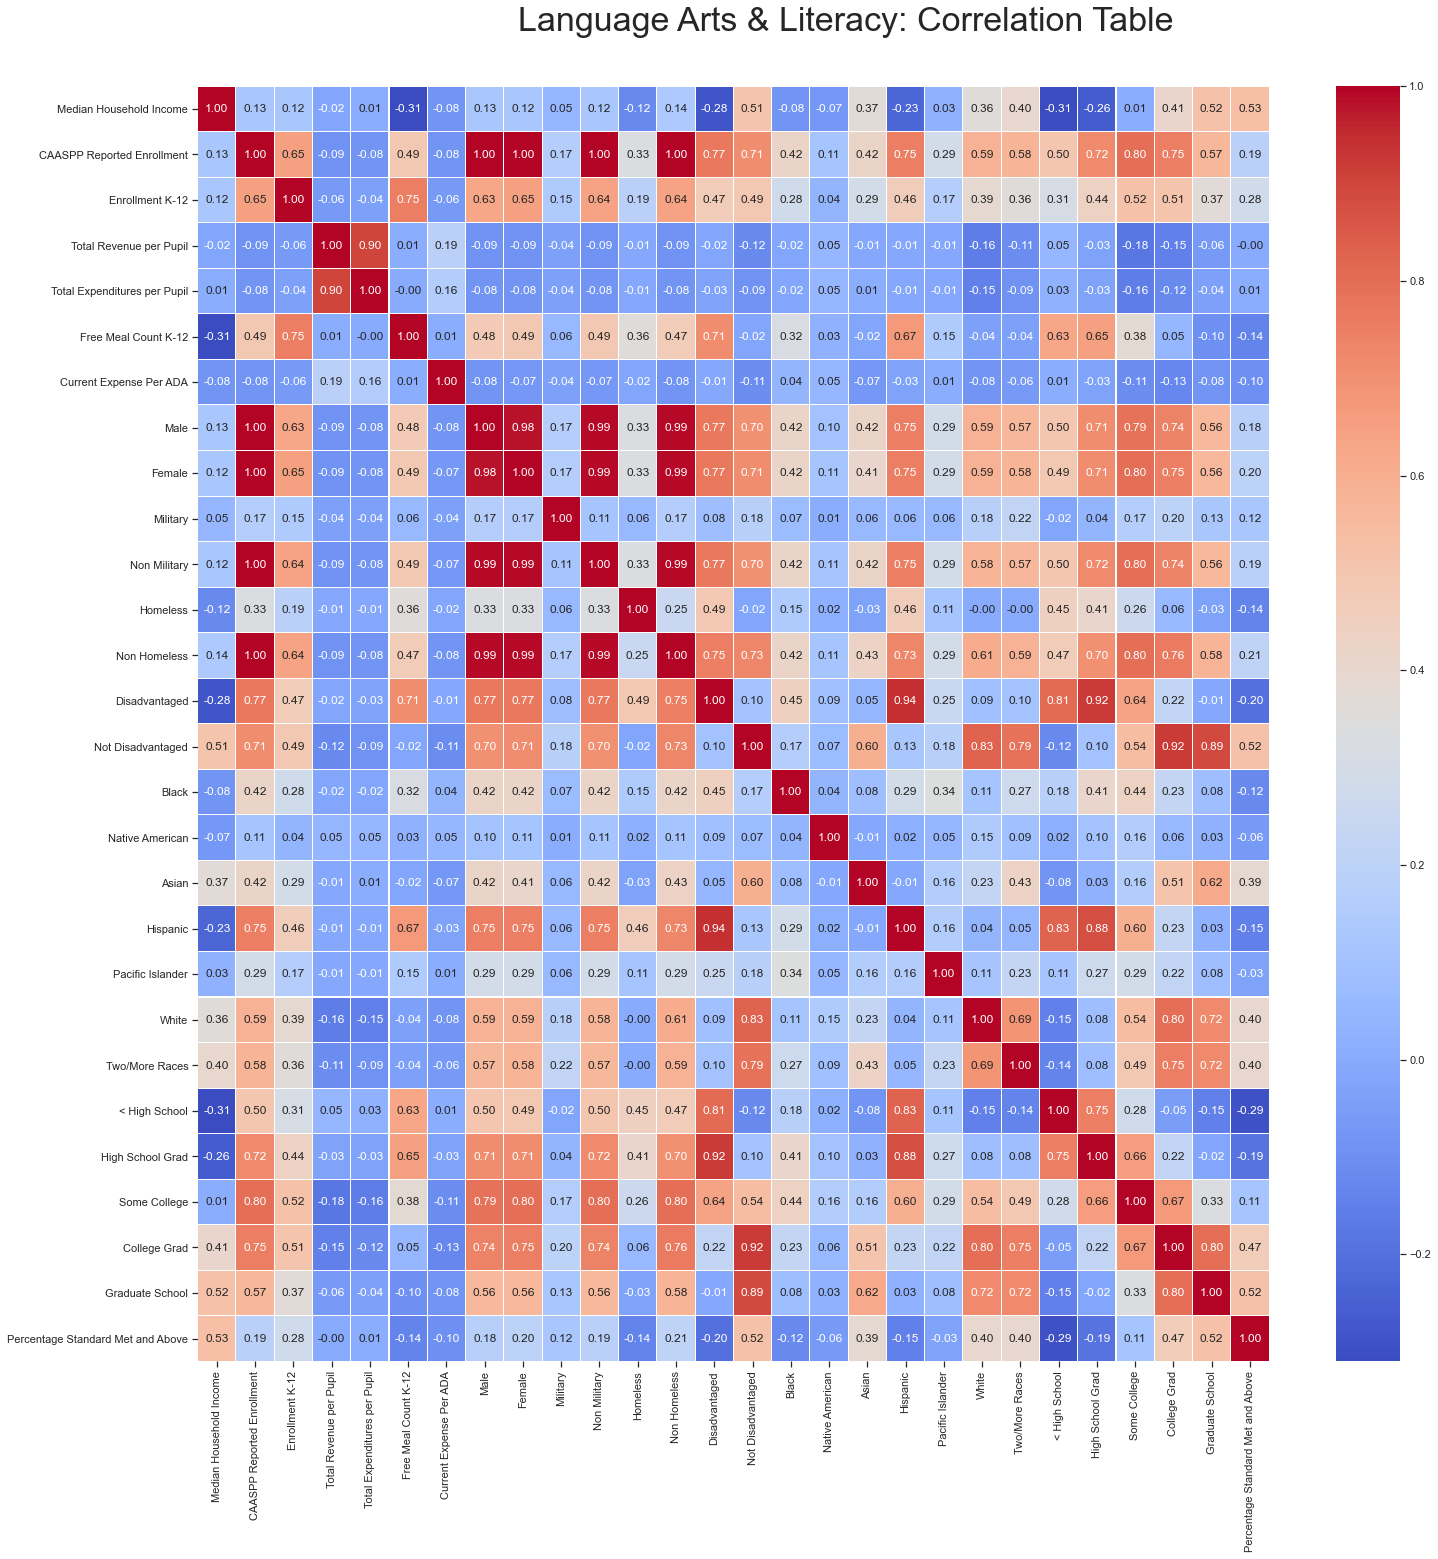

In [88]:
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)

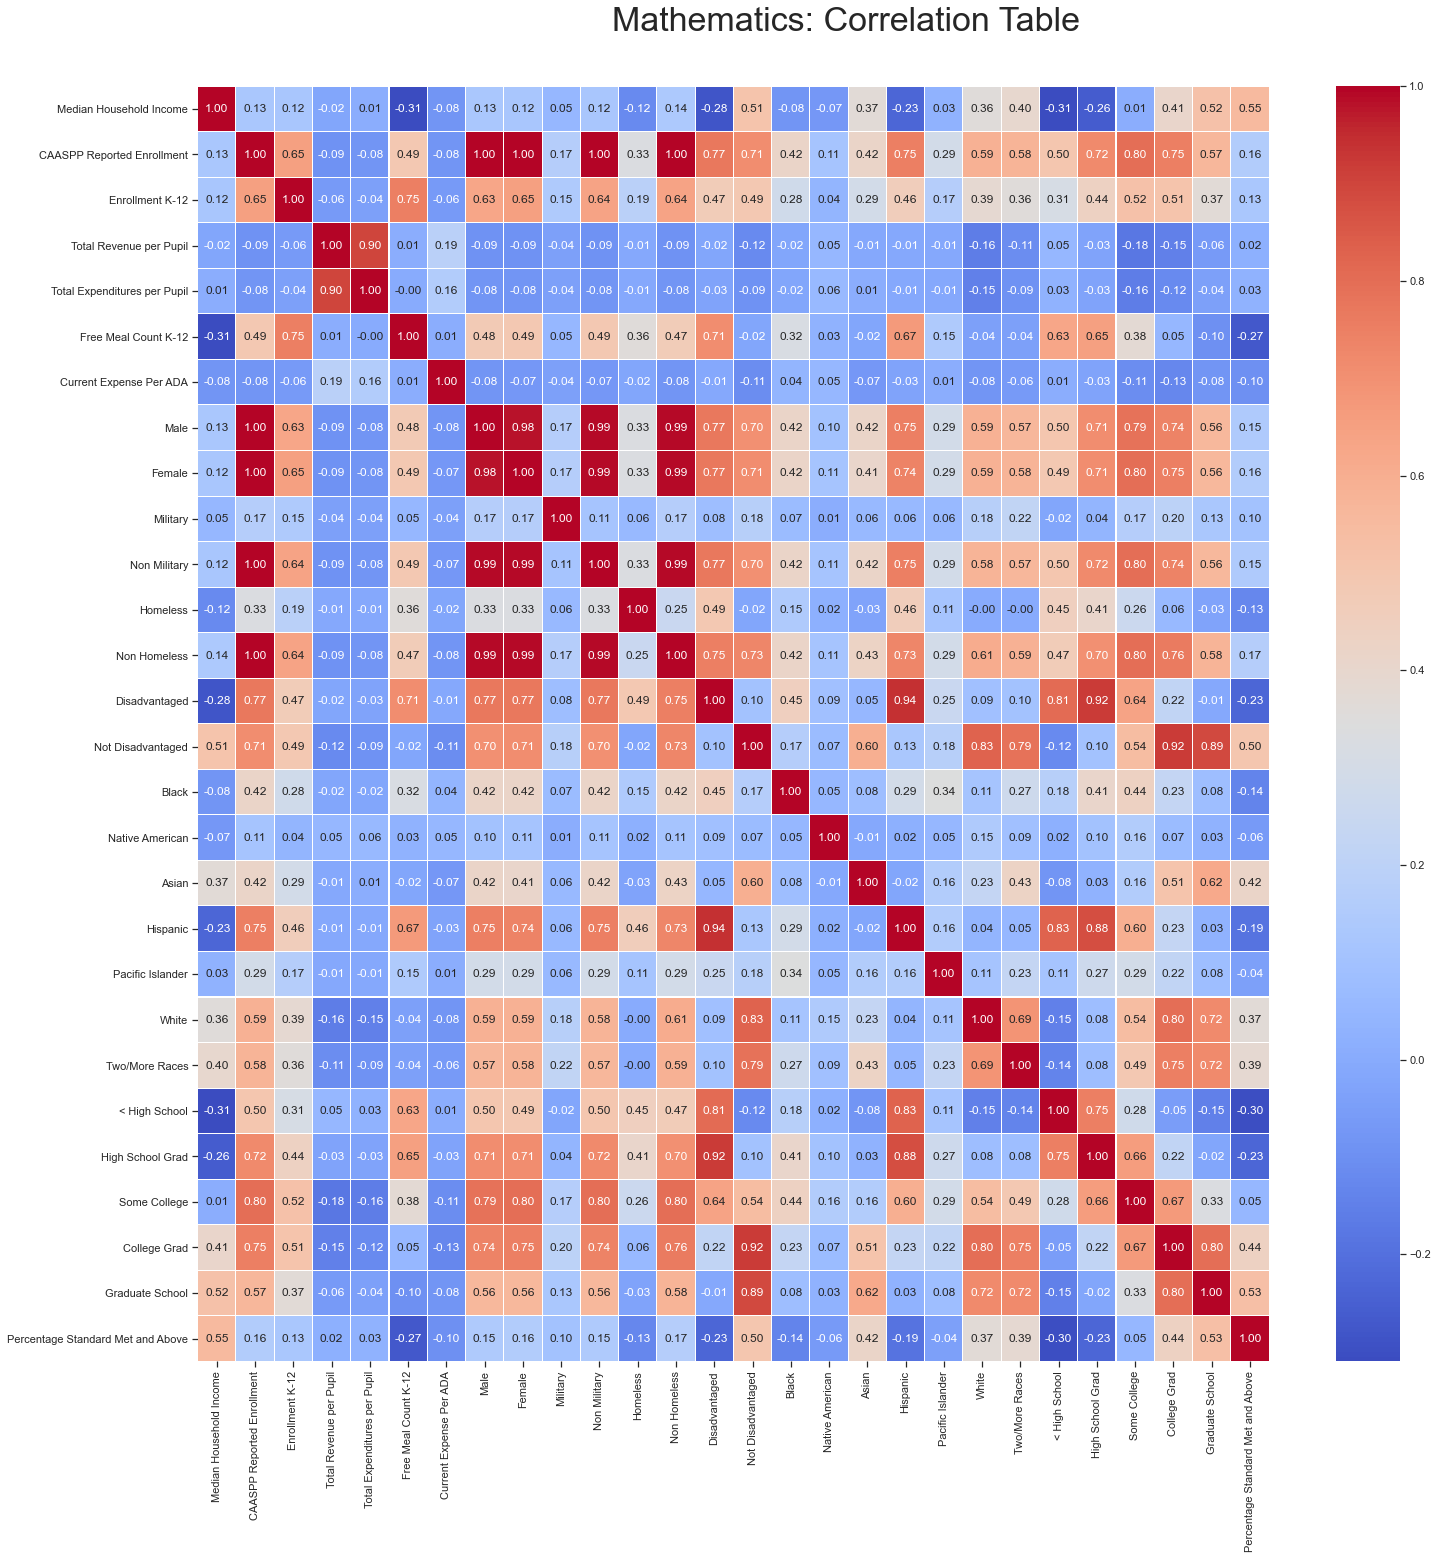

In [89]:
corrmat = table1.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Mathematics: Correlation Table', fontsize=34)

## Pairplots

Another way of evaluating the variables distribution against each other.

In [ ]:
#Create a pairplot for all numeric variables
sns.pairplot(table,  palette='Set1')
plt.show()